In [2]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import metrics
import numpy as np
import pandas as pd
import scipy.io
from tensorflow import keras as K, nn
import seaborn as sns

2023-12-03 16:22:41.473294: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Load dataset of our own handwritten letters

In [3]:
# Load all char datasets of own handwriting to create larger dataset
# chars1, chars2, chars3

data1 = np.load('data/training/chars1.npy')
data2 = np.load('data/training/chars2.npy')
data3 = np.load('data/training/chars3.npy')

np.concatenate
data_total = np.concatenate((data1, data2, data3))
data_total.shape

(77, 28, 28)

## Normalize data

In [4]:
data = data_total/255



## Initialized once
# y = np.empty(data.shape[0], dtype=np.uint8)
y = np.array([7,14,15,4,19,7,8,18,22,99,10,18,99,5,11,13,0,15,17,14,9,4,2,19
,19,7,8,18,8,18,0,99,12,15,11,4,99,23,19,19,7,4,99,99,14,13,99,17
,8,15,19,0,19,7,8,17,3,11,8,13,4,99,19,4,23,19,5,8,13,0,11,12
,4,18,18,0,99])

## Labelling data

In [5]:
chars = 'abcdefghijklmnopqrstuvwxyz'
## Unrecognized character gives 99
def encode_char(x):
    try:
        i = chars.index(x)
        return i
    except ValueError:
        return 99

[ 7 14 15  4 19  7  8 18 22 99 10 18 99  5 11 13  0 15 17 14  9  4  2 19
 19  7  8 18  8 18  0 99 12 15 11  4 99 23 19 19  7  4 99 99 14 13 99 17
  8 15 19  0 19  7  8 17  3 11  8 13  4 99 19  4 23 19  5  8 13  0 11 12
  4 18 18  0 99]


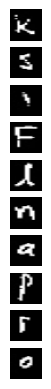

In [6]:
fig, axes = plt.subplots(10)
for i in range(10,20):
    axes[i%10].imshow(data[i,:,:], cmap = "gray")
    axes[i%10].axis('off')

# Manually set labels...
# labels = 'e,-,t,e,x,t,f,i,n,a'.split(',')
# y[60:70] = [encode_char(x) for x in labels]
#print(np.shape(y))
print(y)

## Show data

Char dataset shape:  (77, 28, 28)


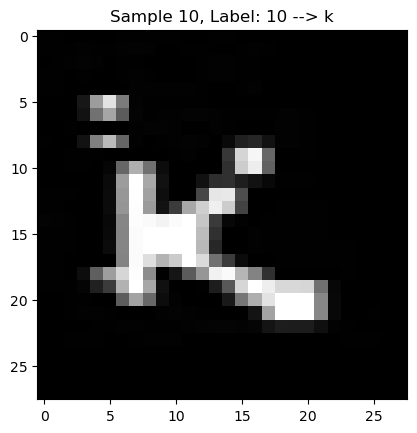

In [7]:
print("Char dataset shape: ", data.shape)
k = np.random.randint(0, len(data))
char = data[k,:,:]
plt.imshow(char, cmap='gray')
label = y[k,]

if label == 99:
    true_char = 'unknown'
else:
    true_char = chars[label]

plt.title('Sample ' + str(k) + ', Label: '+ str(label) + ' --> ' + str(true_char));

# Load EMNIST dataset

In [8]:
emnist = scipy.io.loadmat('data/training/emnist-letters.mat')
emnist_data = emnist['dataset']

X_train = emnist_data['train'][0,0]['images'][0,0]
y_train = emnist_data['train'][0,0]['labels'][0,0]

X_test = emnist_data['test'][0,0]['images'][0,0]
y_test = emnist_data['test'][0,0]['labels'][0,0]

## Create validation set
# val_start = X_train.shape[0] - X_test.shape[0]
# X_val = X_train[val_start:X_train.shape[0],:]
# y_val = y_train[val_start:X_train.shape[0]]
# X_train = X_train[0:val_start,:]
# y_train = y_train[0:val_start]


print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

# print("X validation shape: ", X_val.shape)
# print("y validation shape: ", y_val.shape)

# Scale data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
#y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
#y_test = scaler.fit_transform(y_test)

X train shape:  (124800, 784)
y train shape:  (124800, 1)
X test shape:  (20800, 784)
y test shape:  (20800, 1)


(124800, 28, 28)

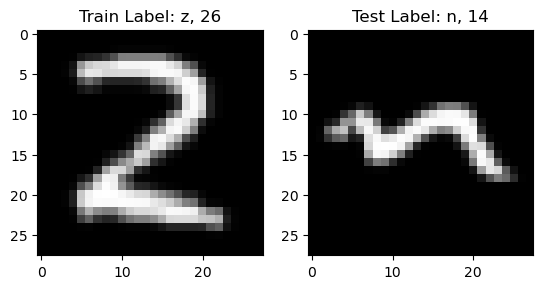

In [9]:
X_train = X_train.reshape((X_train.shape[0], 28, 28), order='F')
X_test = X_test.reshape((X_test.shape[0], 28, 28), order='F')

rand_train = np.random.randint(0, len(X_train))
rand_test = np.random.randint(0, len(X_test))

train_char = X_train[rand_train,:,:]
test_char = X_test[rand_test,:,:]

train_label_i = y_train[rand_train,0]
test_label_i = y_test[rand_test,0]
# Translate labels to letter
letters = 'abcdefghijklmnopqrstuvwxyz'
train_label = letters[train_label_i-1]
test_label = letters[test_label_i-1]

fig, axes = plt.subplots(1,2)
axes[0].imshow(train_char, cmap='gray')
axes[0].set_title(f'Train Label: {train_label}, {train_label_i}')
#plt.title(f'Label: {label}, {label_i}')
axes[1].imshow(test_char, cmap='gray')
axes[1].set_title(f'Test Label: {test_label}, {test_label_i}')



X_train.shape

In [10]:
# X_test = X_test.reshape((X_test.shape[0], 28, 28), order='F')

# random_sample = np.random.randint(0, len(X_test))
# char = X_test[random_sample,:,:]
# label_i = y_test[random_sample,0]
# # Translate labels to letter
# letters = 'abcdefghijklmnopqrstuvwxyz'
# label = letters[label_i-1]

# plt.imshow(char, cmap='gray')
# plt.title(f'Label: {label}, {label_i}')

# Pre-training with EMNIST dataset

In [11]:
# Add channel dimension
X_train = X_train.reshape((X_train.shape[0],28,28,1))
X_test = X_test.reshape((X_test.shape[0],28,28,1))


model = K.models.Sequential([
    K.layers.Conv2D(48, (4,4), activation='relu', input_shape=X_train.shape[1:]),
    K.layers.MaxPool2D((2,2)),
    K.layers.Conv2D(24, (6,3), activation='relu'),
    K.layers.MaxPool2D((3,3)),
    K.layers.Dropout(0.5),
    K.layers.Flatten(),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dense(27, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=1000, verbose=2, validation_data=(X_test, y_test))

Epoch 1/10
125/125 - 37s - loss: 1.9329 - accuracy: 0.4315 - val_loss: 0.7617 - val_accuracy: 0.7738 - 37s/epoch - 295ms/step
Epoch 2/10
125/125 - 35s - loss: 0.9871 - accuracy: 0.6967 - val_loss: 0.5670 - val_accuracy: 0.8292 - 35s/epoch - 278ms/step
Epoch 3/10
125/125 - 35s - loss: 0.8137 - accuracy: 0.7463 - val_loss: 0.4683 - val_accuracy: 0.8642 - 35s/epoch - 280ms/step
Epoch 4/10
125/125 - 35s - loss: 0.7188 - accuracy: 0.7762 - val_loss: 0.4125 - val_accuracy: 0.8767 - 35s/epoch - 280ms/step
Epoch 5/10
125/125 - 35s - loss: 0.6537 - accuracy: 0.7949 - val_loss: 0.3675 - val_accuracy: 0.8877 - 35s/epoch - 281ms/step
Epoch 6/10
125/125 - 35s - loss: 0.6105 - accuracy: 0.8080 - val_loss: 0.3477 - val_accuracy: 0.8940 - 35s/epoch - 280ms/step
Epoch 7/10
125/125 - 35s - loss: 0.5723 - accuracy: 0.8203 - val_loss: 0.3285 - val_accuracy: 0.8970 - 35s/epoch - 280ms/step
Epoch 8/10
125/125 - 35s - loss: 0.5451 - accuracy: 0.8270 - val_loss: 0.3096 - val_accuracy: 0.9041 - 35s/epoch - 282

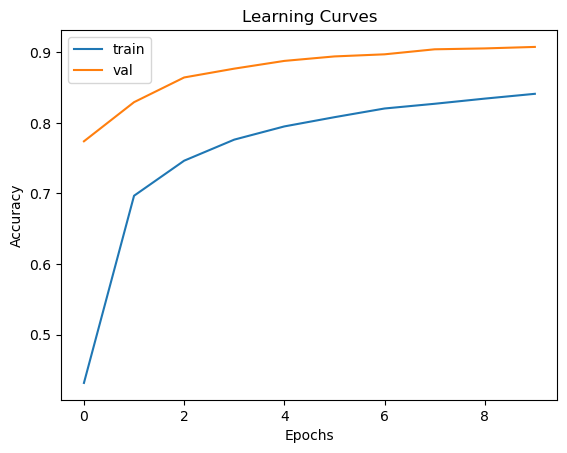

In [13]:
plt.title('Learning Curves')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

In [14]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 90.75000286102295


In [15]:
data = data.reshape(data.shape[0],28,28,1)
# make prediction
proba = model.predict(data, verbose = 0)
pred = [np.argmax(p) for p in proba]

pred_chars = [chars[x-1] for x in pred]
pred_chars

['h',
 'o',
 'p',
 'c',
 't',
 'h',
 'i',
 's',
 'w',
 'm',
 'k',
 's',
 'l',
 'f',
 'x',
 'm',
 'a',
 'p',
 'r',
 'g',
 'j',
 'e',
 'e',
 't',
 't',
 'm',
 'l',
 't',
 'i',
 's',
 'a',
 'u',
 'm',
 'p',
 'i',
 'e',
 'u',
 'x',
 't',
 'd',
 'm',
 'f',
 'y',
 'w',
 'm',
 'm',
 'z',
 'r',
 'i',
 'p',
 't',
 'a',
 't',
 'm',
 'j',
 'f',
 'd',
 'l',
 'l',
 'n',
 'e',
 'd',
 't',
 'c',
 'x',
 't',
 'f',
 'j',
 'm',
 'a',
 'i',
 'm',
 'e',
 's',
 's',
 'a',
 'f']

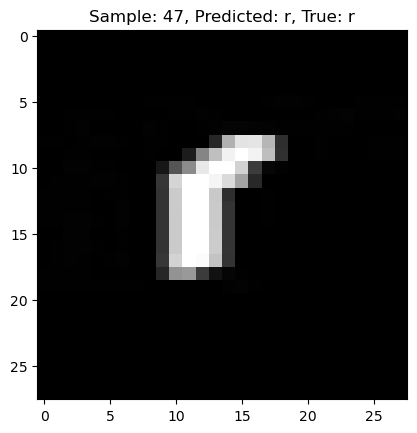

In [16]:
data = data.reshape(data.shape[0],28,28)
k = np.random.randint(0,len(pred_chars))

label = y[k]
if label == 99:
    true_char = 'unknown'
else:
    true_char = chars[label]

plt.imshow(data[k,:,:], cmap='gray')
plt.title(f"Sample: {k}, Predicted: {pred_chars[k]}, True: {true_char}");

[Text(0, 0.5, '-'),
 Text(0, 1.5, 'a'),
 Text(0, 2.5, 'c'),
 Text(0, 3.5, 'd'),
 Text(0, 4.5, 'e'),
 Text(0, 5.5, 'f'),
 Text(0, 6.5, 'g'),
 Text(0, 7.5, 'h'),
 Text(0, 8.5, 'i'),
 Text(0, 9.5, 'j'),
 Text(0, 10.5, 'k'),
 Text(0, 11.5, 'l'),
 Text(0, 12.5, 'm'),
 Text(0, 13.5, 'n'),
 Text(0, 14.5, 'o'),
 Text(0, 15.5, 'p'),
 Text(0, 16.5, 'r'),
 Text(0, 17.5, 's'),
 Text(0, 18.5, 't'),
 Text(0, 19.5, 'u'),
 Text(0, 20.5, 'w'),
 Text(0, 21.5, 'x'),
 Text(0, 22.5, 'y'),
 Text(0, 23.5, 'z')]

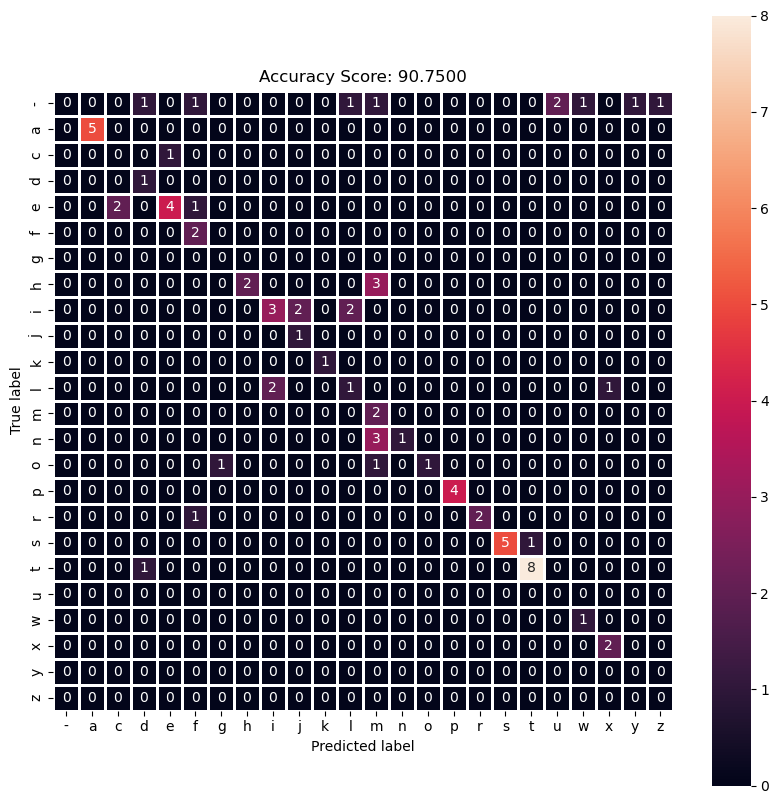

In [57]:
def to_char(index):
    if index == 99:
        return '-'
    else:
        return chars[index]

y_true = [to_char(x) for x in y]
y_pred = pred_chars

set_total = set(y_pred).union(set(y_true))
labels = sorted(list(set_total))

cm = metrics.confusion_matrix(y_true, y_pred)
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=1, square = True);
plt.ylabel('True label');
plt.xlabel('Predicted label');
plt.title('Accuracy Score: {0:.4f}'.format(accuracy*100), size = 12);
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)




In [75]:
np.unique(y_pred)
df = pd.DataFrame(columns=['Pred', 'True'])
df.loc[:,'True'] = y_true
df.loc[:,'Pred'] = y_pred

df.sample(10)

misclassified = df[df['Pred'] != df['True']]
print(f"Misclassified: {len(misclassified)}")
misclassified

Misclassified: 31


,Pred,True
3,c,e
9,m,-
12,l,-
14,x,l
15,m,n
19,g,o
22,e,c
25,m,h
26,l,i
27,t,s


In [84]:
dict = {}
for i in range(0,len(misclassified)):
    pred = misclassified.iloc[i,0]
    dict[pred] = dict.get(pred,0) + 1

dict

{'c': 2,
 'm': 8,
 'l': 3,
 'x': 1,
 'g': 1,
 'e': 1,
 't': 1,
 'u': 2,
 'i': 2,
 'd': 2,
 'f': 3,
 'y': 1,
 'w': 1,
 'z': 1,
 'j': 2}